<a href="https://colab.research.google.com/github/zuzka05/stat_learn/blob/main/QuantTradingAccelerator_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quant Trading Accelerator 🚀

Learn from 0, extremely fast => JIT Learning => Build, Test, Learn, Iterate 🚀

Feedback is important!

## Part 4: Time Series

In [ ]:
#Econometrics - great foundation for quant trading, modelling different dynamics

array => vector => time series

Goals:

1. Basic Statistics
2. Time Series Fundamentals
3. Fundamental Trading Dyanmics

## Statistics

### Central Tendency

### Mean

In [ ]:
#Mean sensitivte to outliers
#Median just takes the middle number

In [1]:
import numpy as np

trade_pnl = [10.0, 11.0, 9.0, -400.0, 2.0, 10.0, 11.0, 11.0, 8, 10.0, 10.2]
np.mean(trade_pnl)

np.float64(-27.981818181818184)

### Median

In [2]:
np.median(trade_pnl)

np.float64(10.0)

### Spread

In [ ]:
#How much the values deviate from values of central tendency?

### Standard Deviation

In [3]:
portfolio_a = [1.0, 1.0, -1.0, 1.0, 1.0 ,1.0,-1.0, 1.0, 1.0, 1.0]
np.sum(portfolio_a)

np.float64(6.0)

In [4]:
np.std(portfolio_a)

np.float64(0.8000000000000002)

In [5]:
portfolio_b = [-10.0, 10.0, -10.0, 15.0, -10.0,16.0,-18.0, 13.0, -10.0, 10.0]
np.sum(portfolio_b)

np.float64(6.0)

In [ ]:
#Measure of dispersion in a central tendency
#There's a higher spread of number from central tendency

In [6]:
np.std(portfolio_b)

np.float64(12.531560158256434)

## Risk-Adjusted Returns

In [ ]:
#Df is a table

In [7]:
import pandas as pd
pd.DataFrame({'portfolio_a':portfolio_a,'portfolio_b':portfolio_b})

,portfolio_a,portfolio_b
0,1.0,-10.0
1,1.0,10.0
2,-1.0,-10.0
3,1.0,15.0
4,1.0,-10.0
5,1.0,16.0
6,-1.0,-18.0
7,1.0,13.0
8,1.0,-10.0
9,1.0,10.0


In [8]:
benchmark = pd.DataFrame([
    ['a',np.sum(portfolio_a),np.mean(portfolio_a),np.std(portfolio_a)],
    ['b',np.sum(portfolio_b),np.mean(portfolio_b),np.std(portfolio_b)]
], columns=['portfolio','total_pnl', 'mean_pnl', 'std_pnl'])

In [9]:
benchmark

,portfolio,total_pnl,mean_pnl,std_pnl
0,a,6.0,0.6,0.80000
1,b,6.0,0.6,12.53156


In [10]:
benchmark['sharpe'] = benchmark['mean_pnl'] / benchmark['std_pnl']
benchmark

,portfolio,total_pnl,mean_pnl,std_pnl,sharpe
0,a,6.0,0.6,0.80000,0.750000
1,b,6.0,0.6,12.53156,0.047879


In [ ]:
#The higher the Sharp, the more consistent and stable are returns

## Correlation

### Positive Correlation

In [11]:
x = [1, 2, 3, 4]
y = [1, 3, 2, 5]

np.corrcoef(x, y)[0, 1]

np.float64(0.8315218406202999)

In [12]:
x = [1, 2, 3, 4]
y = [2, 3, 4, 5]

np.corrcoef(x, y)[0, 1]

np.float64(1.0)

### Negative Correlation

In [13]:
x = [1, 2, 3, 4]
y = [-1, -3, -2, -6]

np.corrcoef(x, y)[0, 1]

np.float64(-0.8366600265340756)

In [14]:
x = [1, 2, 3, 4]
y = [-1, -2, -3, -4]

np.corrcoef(x, y)[0, 1]

np.float64(-1.0)

## Time Series

In [15]:
# Your shared link
url = 'https://drive.google.com/file/d/1qnX9GpiL5Ii1FEnHTIAzWnxNejWnilKp/view?usp=sharing'

# Convert to a direct download link
file_id = url.split('/d/')[1].split('/')[0]
direct_url = f'https://drive.google.com/uc?export=download&id={file_id}'
direct_url

'https://drive.google.com/uc?export=download&id=1qnX9GpiL5Ii1FEnHTIAzWnxNejWnilKp'

In [ ]:
#Below the underlying is BTCUSDT (perp contract)
#Hourly times series

In [16]:
url = 'https://drive.google.com/uc?export=download&id=1qnX9GpiL5Ii1FEnHTIAzWnxNejWnilKp'
btcusdt = pd.read_csv(url, parse_dates=["open_time"], index_col='open_time')

btcusdt

,open,high,low,close,volume
open_time,,,,,
2020-11-27 00:00:00,17155.37,17418.93,17024.20,17400.00,15427.474
2020-11-27 01:00:00,17401.51,17465.00,17271.30,17309.94,16632.689
2020-11-27 02:00:00,17309.93,17328.09,17072.80,17102.38,16168.837
2020-11-27 03:00:00,17102.10,17277.86,17029.32,17084.05,13670.593
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299
...,...,...,...,...,...
2025-11-10 19:00:00,105435.90,106000.00,105354.00,105767.20,2971.178
2025-11-10 20:00:00,105767.10,106249.60,105750.30,105956.70,3483.547
2025-11-10 21:00:00,105956.70,105973.90,105202.70,105583.50,3305.325


In [ ]:
#There's a trend here

<Axes: xlabel='open_time'>

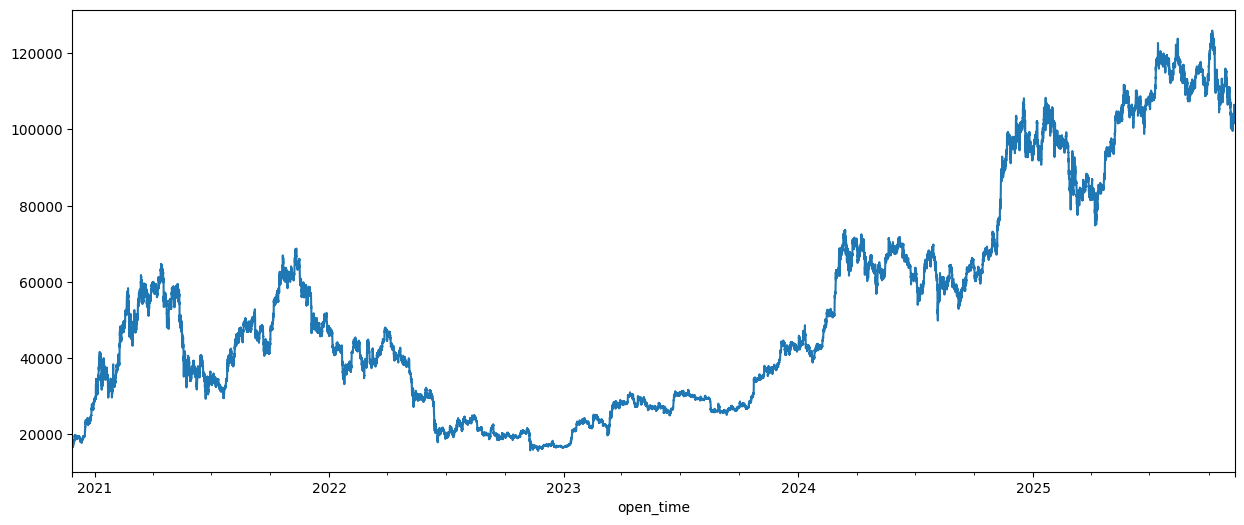

In [17]:
btcusdt['close'].plot(figsize=(15,6))

In [ ]:
#Plot a distribution of the close price
#How many occurrences at a particular price

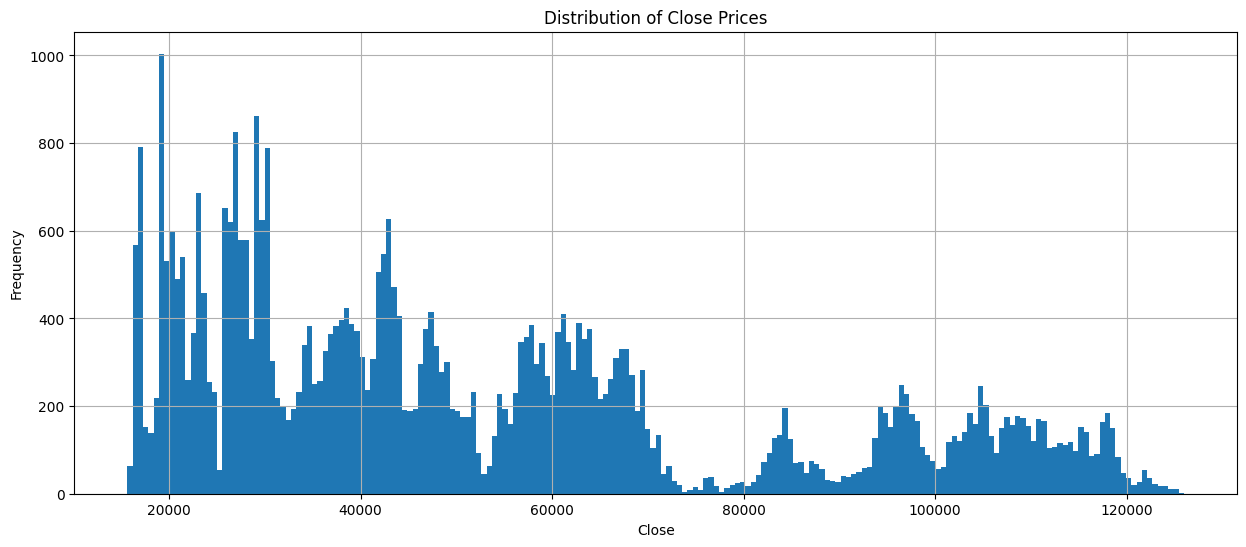

In [18]:
# Plot histogram of the 'close' column
import matplotlib.pyplot as plt

btcusdt['close'].hist(bins=200, figsize=(15,6))
plt.title("Distribution of Close Prices")
plt.xlabel("Close")
plt.ylabel("Frequency")
plt.show()


In [19]:
btcusdt['close'].mean()

np.float64(52732.42998572744)

In [20]:
btcusdt['close'].std()

29266.84838996432

In [ ]:
#Analyze returns or diffs not just prices

## Differencing

In [21]:
btcusdt['close_delta'] = btcusdt['close'] - btcusdt['close'].shift()
btcusdt

,open,high,low,close,volume,close_delta
open_time,,,,,,
2020-11-27 00:00:00,17155.37,17418.93,17024.20,17400.00,15427.474,NaN
2020-11-27 01:00:00,17401.51,17465.00,17271.30,17309.94,16632.689,-90.06
2020-11-27 02:00:00,17309.93,17328.09,17072.80,17102.38,16168.837,-207.56
2020-11-27 03:00:00,17102.10,17277.86,17029.32,17084.05,13670.593,-18.33
2020-11-27 04:00:00,17084.05,17194.00,17061.00,17079.56,10866.299,-4.49
...,...,...,...,...,...,...
2025-11-10 19:00:00,105435.90,106000.00,105354.00,105767.20,2971.178,331.40
2025-11-10 20:00:00,105767.10,106249.60,105750.30,105956.70,3483.547,189.50
2025-11-10 21:00:00,105956.70,105973.90,105202.70,105583.50,3305.325,-373.20


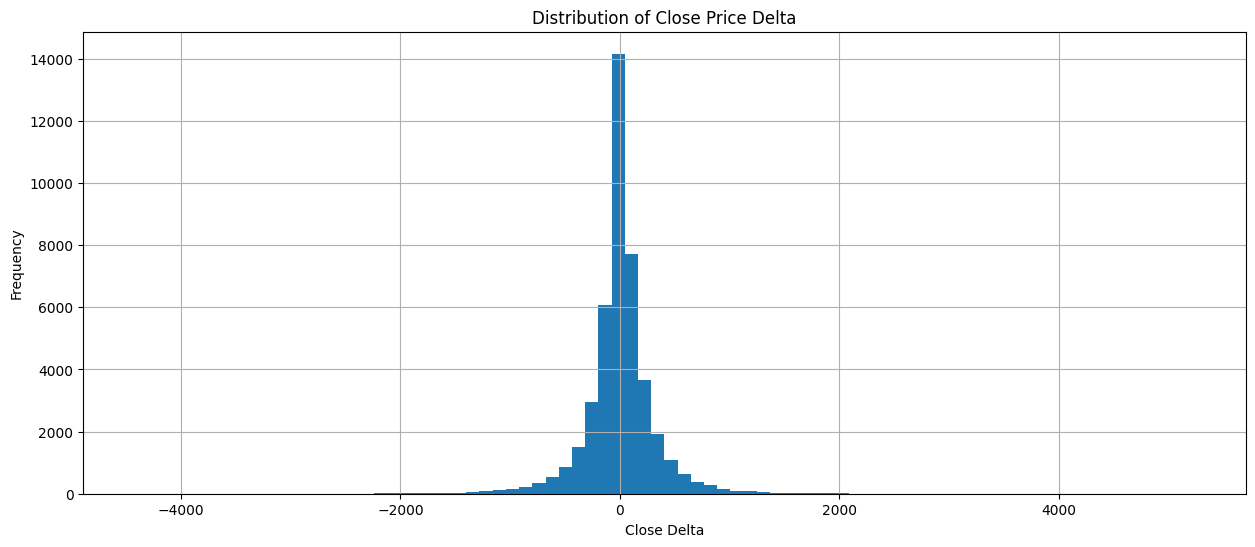

In [22]:
# Plot histogram of the 'close' column
btcusdt['close_delta'].hist(bins=80, figsize=(15,6))
plt.title("Distribution of Close Price Delta")
plt.xlabel("Close Delta")
plt.ylabel("Frequency")
plt.show()

In [23]:
btcusdt['close_delta'].mean()

np.float64(2.038865995994383)

In [24]:
btcusdt['close_delta'].std()

334.6994054851111

In [ ]:
#By taking a difference, it makes it more of a statistical dist with 1 peak

In [ ]:
#By looking at price movements, what's the probability of it going up by $500?

### Stationarity Vs Non-Stationary (Differencing != Stationarity)

In [ ]:
#Stationarity - statistical properties of TS are constant over time, they never change

In [ ]:
#If you take the difference, it makes it stationary or weakly stationary

In [ ]:
#Group it by year
#How do you quantify weakly stationary?
#If you take the difference, it makes it more predictable but not more stationary


In [25]:
yearly_stats = btcusdt['close_delta'].resample('YE').agg(['mean', 'std'])

In [26]:
yearly_stats

,mean,std
open_time,,
2020-12-31,13.768391,172.361174
2021-12-31,1.970192,407.265282
2022-12-31,-3.387324,202.578210
2023-12-31,2.942511,131.701455
2024-12-31,5.832753,379.158165
2025-12-31,1.647744,462.794828


### Lags

In [ ]:
#You want to predict future values of TS, from the previous values of TS

In [27]:
btcusdt['close_delta_lag_1'] = btcusdt['close_delta'].shift()
btcusdt['close_delta_lag_2'] = btcusdt['close_delta'].shift(2)
btcusdt['close_delta_lag_3'] = btcusdt['close_delta'].shift(3)
btcusdt['close_delta_lag_4'] = btcusdt['close_delta'].shift(4)

In [28]:
btcusdt[['close_delta','close_delta_lag_1','close_delta_lag_2','close_delta_lag_3','close_delta_lag_4']].head(10)

,close_delta,close_delta_lag_1,close_delta_lag_2,close_delta_lag_3,close_delta_lag_4
open_time,,,,,
2020-11-27 00:00:00,NaN,NaN,NaN,NaN,NaN
2020-11-27 01:00:00,-90.06,NaN,NaN,NaN,NaN
2020-11-27 02:00:00,-207.56,-90.06,NaN,NaN,NaN
2020-11-27 03:00:00,-18.33,-207.56,-90.06,NaN,NaN
2020-11-27 04:00:00,-4.49,-18.33,-207.56,-90.06,NaN
2020-11-27 05:00:00,187.98,-4.49,-18.33,-207.56,-90.06
2020-11-27 06:00:00,19.16,187.98,-4.49,-18.33,-207.56
2020-11-27 07:00:00,-181.45,19.16,187.98,-4.49,-18.33
2020-11-27 08:00:00,-247.50,-181.45,19.16,187.98,-4.49


In [ ]:
#Gradient boosting models not sensitive to NaNs
#Otherwise we need to drop them

In [29]:
btcusdt[['close_delta','close_delta_lag_1','close_delta_lag_2','close_delta_lag_3','close_delta_lag_4']].dropna().head(10)

,close_delta,close_delta_lag_1,close_delta_lag_2,close_delta_lag_3,close_delta_lag_4
open_time,,,,,
2020-11-27 05:00:00,187.98,-4.49,-18.33,-207.56,-90.06
2020-11-27 06:00:00,19.16,187.98,-4.49,-18.33,-207.56
2020-11-27 07:00:00,-181.45,19.16,187.98,-4.49,-18.33
2020-11-27 08:00:00,-247.50,-181.45,19.16,187.98,-4.49
2020-11-27 09:00:00,-196.77,-247.50,-181.45,19.16,187.98
2020-11-27 10:00:00,262.85,-196.77,-247.50,-181.45,19.16
2020-11-27 11:00:00,-126.64,262.85,-196.77,-247.50,-181.45
2020-11-27 12:00:00,273.80,-126.64,262.85,-196.77,-247.50
2020-11-27 13:00:00,-120.92,273.80,-126.64,262.85,-196.77


## Serial Correlation

In [ ]:
#Look at the correlation between values and TS
#Correlation between lag_1 and close_delta is a negative value
#When lag_1 goes up, close_delta will go down
#The correlation decays over time, the strongest one is with the previous value
#MR, previous value is down, more likely to go up etc

In [30]:
btcusdt[['close_delta','close_delta_lag_1','close_delta_lag_2','close_delta_lag_3','close_delta_lag_4']].dropna().corr()

,close_delta,close_delta_lag_1,close_delta_lag_2,close_delta_lag_3,close_delta_lag_4
close_delta,1.000000,-0.010315,-0.007620,-0.004989,-0.004865
close_delta_lag_1,-0.010315,1.000000,-0.010312,-0.007622,-0.004987
close_delta_lag_2,-0.007620,-0.010312,1.000000,-0.010279,-0.007638
close_delta_lag_3,-0.004989,-0.007622,-0.010279,1.000000,-0.010261
close_delta_lag_4,-0.004865,-0.004987,-0.007638,-0.010261,1.000000


## Auto-Regression

### First-Order Auto-Regressive Model: AR(1)

In [ ]:
#returns in log-space become additive
#AR making a prediction from a previous lag

In [31]:
ts = pd.DataFrame({'log_return':[-0.1, 0.2, -0.2, 0.1, -0.3, 0.3]})

# Number of rows
n = len(ts)

# Create date index ending today
dates = pd.date_range(end=pd.Timestamp.today().normalize(), periods=n, freq='D')

# Assign the date index
ts.index = dates

ts

,log_return
2025-12-14,-0.1
2025-12-15,0.2
2025-12-16,-0.2
2025-12-17,0.1
2025-12-18,-0.3
2025-12-19,0.3


In [ ]:
#from this lag predict the next log return

In [32]:
ts['log_return_lag_1'] = ts['log_return'].shift()
ts

,log_return,log_return_lag_1
2025-12-14,-0.1,NaN
2025-12-15,0.2,-0.1
2025-12-16,-0.2,0.2
2025-12-17,0.1,-0.2
2025-12-18,-0.3,0.1
2025-12-19,0.3,-0.3


### AR(1) Model Definition

In [ ]:
#Model a relationship between y and lag_y1 + bias
#It can model 2 fundamental trading dynamics

In [33]:
y = ts['log_return']
y_lag_1 = ts['log_return_lag_1']

weight, bias = 0.0, 0.0

y = weight * y_lag_1 + bias

## Fundamental Trading Dynamics using AR(1)

1. Mean Reversion
2. Momentum

### Mean Reversion

In [ ]:
#How to calculate weight and bias
#Mathematical optimization
#Mathematically choose the best parameters for w and b

#Use log_return_lag_1 to predict log_return
#We always want to know the value to predict the next time step

#Directional accuracy, is y_hat and log_return same direction?
#log_return is reversing around mean (roughly around 0)

In [ ]:
#New TS that exhibits momentum behaviour
#Predict log_return from the lag
#How it models it as the weight is a negative number
#It inverses the sign of the lag
#If the lag is negative then invert it to a positive and the bias - that's the MR
#weight interprets the trading dynamics

In [34]:
weight = -0.5
bias = 0.00001
ts['y_hat'] = weight * ts['log_return_lag_1'] + bias

ts

,log_return,log_return_lag_1,y_hat
2025-12-14,-0.1,NaN,NaN
2025-12-15,0.2,-0.1,0.05001
2025-12-16,-0.2,0.2,-0.09999
2025-12-17,0.1,-0.2,0.10001
2025-12-18,-0.3,0.1,-0.04999
2025-12-19,0.3,-0.3,0.15001


### Momentum

In [35]:
ts = pd.DataFrame({'log_return':[0.1, 0.2, 0.3, 0.4,-0.1, -0.2, -0.3, -0.4]})

# Number of rows
n = len(ts)

# Create date index ending today
dates = pd.date_range(end=pd.Timestamp.today().normalize(), periods=n, freq='D')

# Assign the date index
ts.index = dates
ts['log_return_lag_1'] = ts['log_return'].shift()
ts

,log_return,log_return_lag_1
2025-12-12,0.1,NaN
2025-12-13,0.2,0.1
2025-12-14,0.3,0.2
2025-12-15,0.4,0.3
2025-12-16,-0.1,0.4
2025-12-17,-0.2,-0.1
2025-12-18,-0.3,-0.2
2025-12-19,-0.4,-0.3


In [ ]:
#The predicted future log return
#Weight is positive now
#It's a positive decay of lag1 + some bias

#When regime changes, statistical properties change
#Going down, the first one predicts incorrectly

In [36]:
weight = 0.5
bias = 0.0001

ts['y_hat'] = weight * ts['log_return_lag_1'] + bias

ts

,log_return,log_return_lag_1,y_hat
2025-12-12,0.1,NaN,NaN
2025-12-13,0.2,0.1,0.0501
2025-12-14,0.3,0.2,0.1001
2025-12-15,0.4,0.3,0.1501
2025-12-16,-0.1,0.4,0.2001
2025-12-17,-0.2,-0.1,-0.0499
2025-12-18,-0.3,-0.2,-0.0999
2025-12-19,-0.4,-0.3,-0.1499


Next video => Matrices